In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import shutil
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import pandas as pd



In [2]:
seed_value = 42
tf.random.set_seed(seed_value)
np.random.seed(seed_value)

In [3]:
# Define parameters
img_height, img_width = 320, 320
batch_size = 32
num_classes = 4  # Changes based on number of species


In [4]:
#image data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)


In [5]:
dirs = os.listdir('C:/Users/STEVE KENNETH/Desktop/final project/dataset/t/train')
for dir in dirs:
    files = list(os.listdir('C:/Users/STEVE KENNETH/Desktop/final project/dataset/t/train/'+dir))
    print(dir + ' Folder has ' + str(len(files)) + ' images')

Angel_fish Folder has 678 images
Asian_Arowana Folder has 456 images
Cardinal_Tetra Folder has 405 images
Clown_Loach Folder has 469 images


In [6]:
base_dir= 'C:/Users/STEVE KENNETH/Desktop/final project/dataset/t/'
train_dir = 'C:/Users/STEVE KENNETH/Desktop/final project/dataset/t/train/'
val_dir = 'C:/Users/STEVE KENNETH/Desktop/final project/dataset/t/test/'

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 1774 images belonging to 4 classes.


In [8]:
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 332 images belonging to 4 classes.


In [9]:
# Define the CNN model

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),  # Converts 3D feature maps to 1D feature vectors
    Dense(512, activation='relu'),  # Fully connected layer
    Dropout(0.5),  # Dropout for regularization
    Dense(num_classes, activation='softmax')  # Output layer with softmax for classification
])



In [10]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [21]:
# Train the model
history = model.fit(
    train_generator,
    epochs=33,
    validation_data=val_generator
)


C:\Anaconda\Lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/33


56/56 [==============================] - 102s 2s/step - loss: 1.3693 - accuracy: 0.3760 - val_loss: 1.1173 - val_accuracy: 0.5783
Epoch 2/33
56/56 [==============================] - 93s 2s/step - loss: 1.0441 - accuracy: 0.5981 - val_loss: 0.7965 - val_accuracy: 0.7259
Epoch 3/33
56/56 [==============================] - 94s 2s/step - loss: 0.8227 - accuracy: 0.6838 - val_loss: 0.6398 - val_accuracy: 0.7771
Epoch 4/33
56/56 [==============================] - 93s 2s/step - loss: 0.6622 - accuracy: 0.7525 - val_loss: 0.5438 - val_accuracy: 0.8163
Epoch 5/33
56/56 [==============================] - 93s 2s/step - loss: 0.5692 - accuracy: 0.7813 - val_loss: 0.3874 - val_accuracy: 0.8584
Epoch 6/33
56/56 [==============================] - 92s 2s/step - loss: 0.4882 - accuracy: 0.8269 - val_loss: 0.3728 - val_accuracy: 0.8614
Epoch 7/33
56/56 [==============================] - 93s 2s/step - loss: 0.3925 - accuracy: 0.8512 - val_loss: 0.3710 - val_accuracy: 0.8825
Epoch 8/33
56/56 

In [23]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(320,320 ))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + class_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

In [17]:
class_names = list(train_generator.class_indices.keys())

In [18]:
class_names

['Angel_fish', 'Asian_Arowana', 'Cardinal_Tetra', 'Clown_Loach']

In [18]:
classify_images('C:/Users/STEVE KENNETH/Desktop/final project/dataset/check/3.png')

1/1 [==============================] - 0s 47ms/step


'The Image belongs to Clown_Loach with a score of 47.536686062812805'

In [19]:
model.save('C:/Users/STEVE KENNETH/Desktop/final project/dataset/check/cnn_model_final_2.h5')

In [12]:
from tensorflow.keras.models import load_model


In [13]:
trained_model = load_model('C:/Users/STEVE KENNETH/Desktop/final project/dataset/check/cnn_model_final_2.h5')

In [14]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(320,320 ))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = trained_model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + class_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

In [19]:
classify_images('C:/Users/STEVE KENNETH/Desktop/final project/dataset/check/2.jpg')

1/1 [==============================] - 0s 109ms/step


'The Image belongs to Angel_fish with a score of 47.47942090034485'

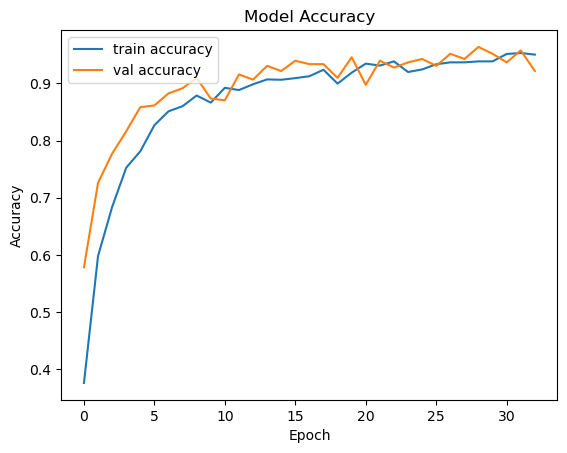

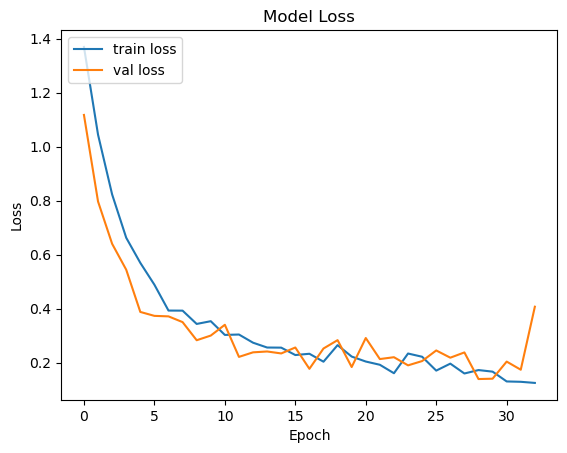

11/11 [==============================] - 9s 790ms/step - loss: 0.4067 - accuracy: 0.9217
Validation Loss: 0.4066905677318573
Validation Accuracy: 0.9216867685317993


In [24]:
#Plot Training Accuracy and Loss
def plot_training_history(history):
    # Plotting accuracy
    plt.plot(history.history['accuracy'], label='train accuracy')
    plt.plot(history.history['val_accuracy'], label='val accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.show()

    # Plotting loss
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='val loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.show()

# Call the function to plot training history
plot_training_history(history)

# Step 2: Evaluate Model on Validation Set
def evaluate_model_on_validation_set(model, val_generator):
    val_loss, val_accuracy = model.evaluate(val_generator, verbose=1)
    print(f'Validation Loss: {val_loss}')
    print(f'Validation Accuracy: {val_accuracy}')
    return val_loss, val_accuracy
